In [14]:
import cv2
import matplotlib.pyplot as plt

import yaml

In [15]:
# ---------- params ----------
# WEIGHT = "internal_assets/weights/best.pt"
WEIGHT = "finetuned_head_epoch3.pt"
INPUT_SIZE = (640, 640) 
CONF_THR = 0.25
IOU_THR = 0.45
IMG_PATH = ["internal_assets/dataset/VietNam_street.png",
            "internal_assets/dataset/Highway_vertical.png",
            "internal_assets/dataset/VN_Highway.png"]
DATA_YAML = "utils/args.yaml"   # Path to dataset yaml

In [16]:
with open(DATA_YAML, "r") as f:
    data_dict = yaml.safe_load(f)

names = data_dict["names"]   # dict {0:"person",1:"bicycle",...}


In [17]:
# # ---------- utils ----------
# def letterbox(img, new_shape=(640, 640), color=(114, 114, 114)):
#     # img: BGR numpy (H, W, C) as loaded by cv2
#     h0, w0 = img.shape[:2]
#     new_h, new_w = new_shape
#     r = min(new_h / h0, new_w / w0)
#     new_unpad_w = int(round(w0 * r))
#     new_unpad_h = int(round(h0 * r))
#     # resize
#     img_resized = cv2.resize(img, (new_unpad_w, new_unpad_h), interpolation=cv2.INTER_LINEAR)
#     # compute padding
#     dw = new_w - new_unpad_w
#     dh = new_h - new_unpad_h
#     top = int(round(dh / 2 - 0.1))
#     bottom = int(round(dh / 2 + 0.1))
#     left = int(round(dw / 2 - 0.1))
#     right = int(round(dw / 2 + 0.1))
#     img_padded = cv2.copyMakeBorder(img_resized, top, bottom, left, right,
#                                     cv2.BORDER_CONSTANT, value=color)
#     return img_padded, r, (left, top)


In [18]:
def letterbox_visualize(
    img_path: str,
    new_shape: tuple = (640, 640),
    color=(114, 114, 114),
    out_dir: str = "internal_assets/letterbox_outputs",
    basename: str = None
):
    """
    Visualize and save original, resized (unpad), and letterboxed images as PNGs.
    - out_dir: directory to save images to
    - basename: optional prefix/base name for the saved files
    """
    # Create output directory if not exist

    img_bgr = cv2.imread(img_path)
    if img_bgr is None:
        raise FileNotFoundError(f"Image not found: {img_path}")
    orig_h, orig_w = img_bgr.shape[:2]
    img_orig_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

    # Compute resize (unpad) step
    new_h, new_w = new_shape
    r = min(new_h / orig_h, new_w / orig_w)
    new_unpad_w = int(round(orig_w * r))
    new_unpad_h = int(round(orig_h * r))
    img_resized = cv2.resize(img_bgr, (new_unpad_w, new_unpad_h),
                             interpolation=cv2.INTER_LINEAR)
    img_resized_rgb = cv2.cvtColor(img_resized, cv2.COLOR_BGR2RGB)

    # Compute padding to get letterbox
    dw = new_w - new_unpad_w
    dh = new_h - new_unpad_h
    top = int(round(dh / 2 - 0.1))
    bottom = int(round(dh / 2 + 0.1))
    left = int(round(dw / 2 - 0.1))
    right = int(round(dw / 2 + 0.1))
    img_padded = cv2.copyMakeBorder(img_resized, top, bottom, left, right,
                                    cv2.BORDER_CONSTANT, value=color)
    
    img_padded_rgb = cv2.cvtColor(img_padded, cv2.COLOR_BGR2RGB)

    # Decide base name for saving
    basename = img_path[0]

    # Save images individually
    orig_save = f"{out_dir}/original.png"
    resized_save = f"{out_dir}/resized.png"
    padded_save = f"{out_dir}/letterbox.png"

    plt.imsave(orig_save, img_orig_rgb)
    plt.imsave(resized_save, img_resized_rgb)
    plt.imsave(padded_save, img_padded_rgb)

    print(f"Saved original -> {orig_save}")
    print(f"Saved resized (unpad) -> {resized_save}")
    print(f"Saved letterbox padded -> {padded_save}")

    # (Optional) also show side-by-side in a single figure if desired
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    titles = [
        f"Original ({orig_h}×{orig_w})",
        f"Resized → {new_unpad_h}×{new_unpad_w}, r={r:.3f}",
        f"Letterbox padded → {new_shape}"
    ]
    images = [img_orig_rgb, img_resized_rgb, img_padded_rgb]

    for ax, im, title in zip(axes, images, titles):
        ax.imshow(im)
        ax.set_title(title)
        ax.axis("off")

    plt.tight_layout()
    plt.show()

Saved original -> internal_assets/letterbox_outputs/original.png
Saved resized (unpad) -> internal_assets/letterbox_outputs/resized.png
Saved letterbox padded -> internal_assets/letterbox_outputs/letterbox.png


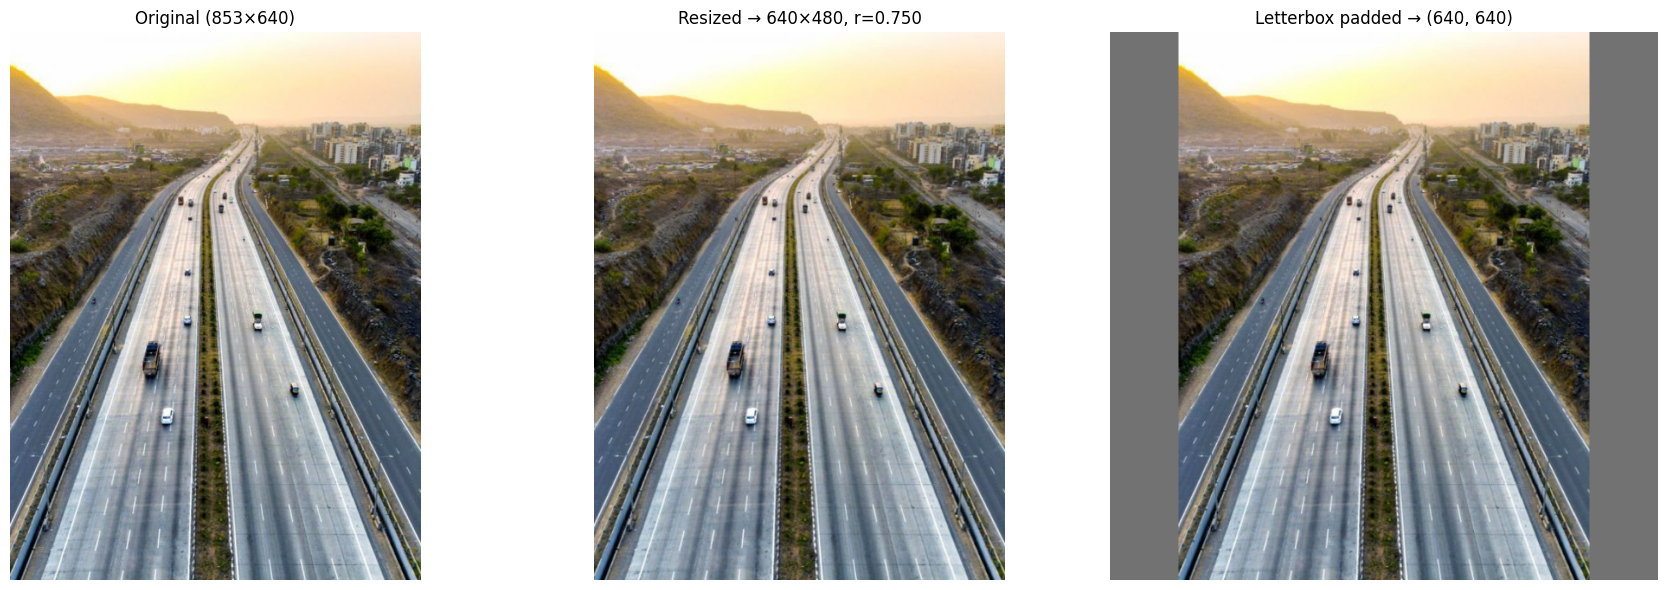

In [19]:
letterbox_visualize(IMG_PATH[1])

Saved original -> internal_assets/letterbox_outputs/original.png
Saved resized (unpad) -> internal_assets/letterbox_outputs/resized.png
Saved letterbox padded -> internal_assets/letterbox_outputs/letterbox.png


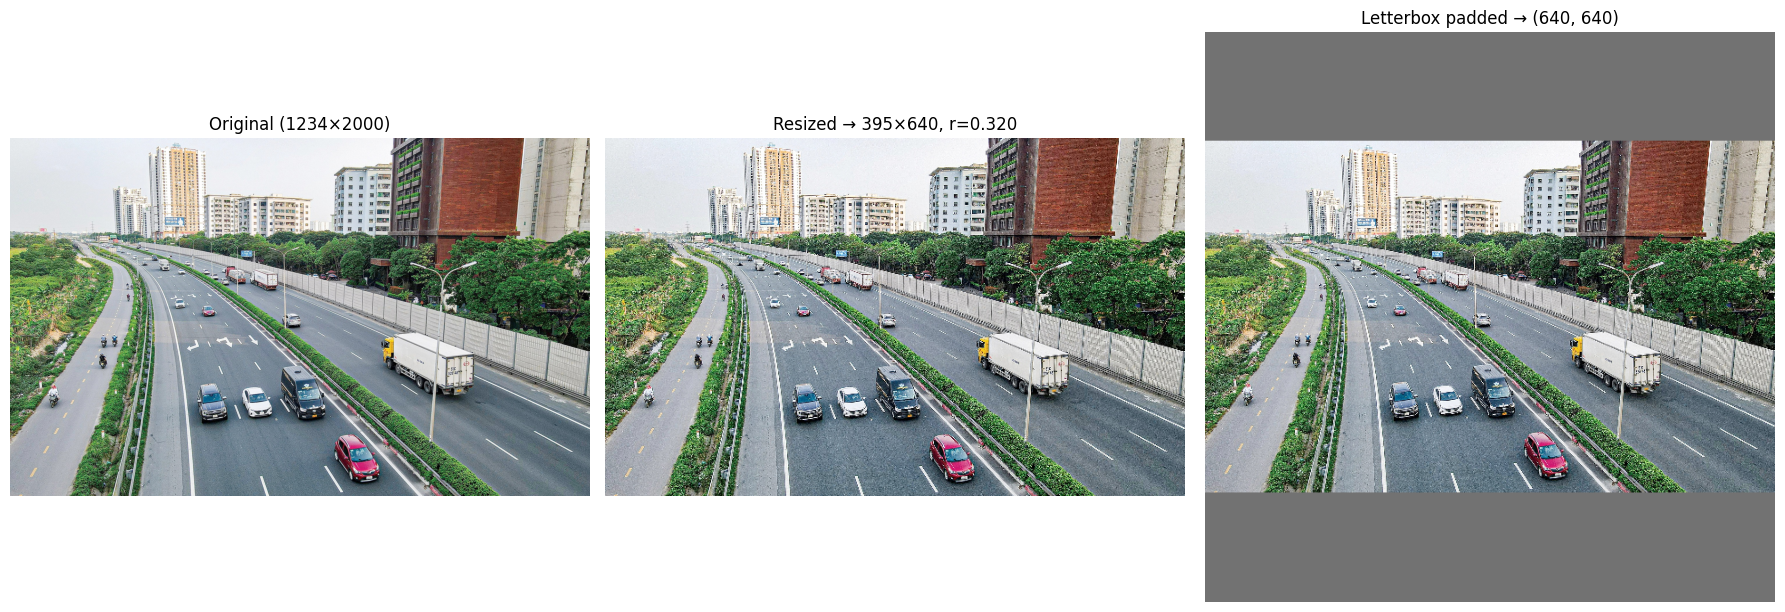

In [20]:
letterbox_visualize(IMG_PATH[2])